In [85]:
%load_ext autoreload
%autoreload 2

import torch

from tools.plot.im import imshow_all
from tools.gaussian.SpotVector import GaussSpot
from tools.gaussian.gen import generate, TruncGaussParams
from detection.GDN.Model import ShapeDetector

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [86]:
# this ensures that the current MacOS version is at least 12.3+
#print(torch.backends.mps.is_available())
# this ensures that the current current PyTorch installation was built with MPS activated.
#print(torch.backends.mps.is_built())

device = torch.device("cpu")
# device = torch.device("mps")
# %env PYTORCH_ENABLE_MPS_FALLBACK=1


In [87]:
IMAGE_SIZE=64
detector = ShapeDetector(GaussSpot.SIZE, IMAGE_SIZE,  device=device)

In [90]:

batch_size=32
n_batches=500
detector.train(
    [generate(IMAGE_SIZE, batch_size=batch_size).to(device) for _ in range(n_batches) ],
    epochs=3,
    
)

Iter:  0  Loss:  0.006725883577018976
Iter:  10  Loss:  0.0187073384411633
Iter:  20  Loss:  0.013156857062131166
Iter:  30  Loss:  0.010272983461618423
Iter:  40  Loss:  0.01013727211393416
Iter:  50  Loss:  0.007940455619245768
Iter:  60  Loss:  0.009052422735840083
Iter:  70  Loss:  0.009104070579633116
Iter:  80  Loss:  0.007155183842405677
Iter:  90  Loss:  0.007315988861955702
Iter:  100  Loss:  0.008103782637044787
Iter:  110  Loss:  0.008349634287878872
Iter:  120  Loss:  0.0067656923085451124


KeyboardInterrupt: 

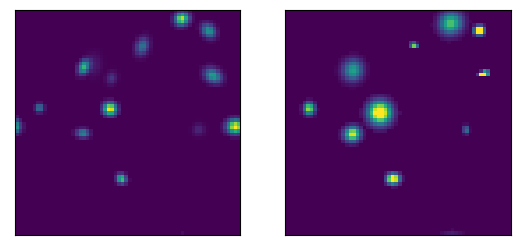

In [93]:
test_batch = generate(
    IMAGE_SIZE,
    batch_size=1,
    # intensity=TruncGaussParams(range=(0, 1), mu=1., sig=1.),
    # sig=TruncGaussParams(range=(0.1, 2 ), mu=1, sig=0.3),
    # sig_max_xy_ratio=1.6,
).to(device)

orig_image = detector._sum_image(test_batch)

_, _, pred_images  = detector.forward_with_image(orig_image)
pred_images = pred_images.detach()

imshow_all(orig_image.squeeze(0), pred_images.squeeze(0))